<a href="https://colab.research.google.com/github/ZuzannaNogala/MCARD/blob/master/MCARD_Nogala_l4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION TO NEURAL NETWORKS, PART 1

Zuzanna Nogala

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# keras
from keras.datasets import mnist

from keras.models import Sequential, Model
from keras.layers import Dense
from keras import optimizers
from sklearn.linear_model import LinearRegression
from datetime import datetime
# torch
import torch

!pip install torchinfo
from torchinfo import summary as torch_summary

Reconstructed images:


*   Row 1 = original images
*   Row 2 = PCA
*   Row 3 = AE_keras_small
*   Row 4 = AE_torch_small
*   Row 5 = AE_keras_larger
*   Row 6 = AE_torch_larger (to do)

# Q4.1 (10 pts)

* Implement the same/similar Autoencoder for mnist, but **in PyTorch** and repeat previous steps: display reduced points, display (as fifth row) reconstructed images etc.

In [29]:
# READ DATA
# 60000 images 28 x 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

n_samples_train, h, w = x_train.shape
n_samples_test, _, _ = x_test.shape

image_size = h*w

# 60000 images 28 * 28 = 784 (flatten) and normalised!
x_train = x_train.reshape(x_train.shape[0], 784) / 255
x_test = x_test.reshape(x_test.shape[0], 784) / 255

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test = x_test.reshape(x_test.shape[0], 784) / 255

In [5]:
from torch.utils.data import DataLoader, TensorDataset

# PYTORCH LARGE IMPLEMENTATION
dataset = TensorDataset(x_train_tensor, x_train_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# ENCODER AND DECODER
torch_large_encoder = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 2),
)

torch_large_decoder = torch.nn.Sequential(
    torch.nn.Linear(2, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large = torch.nn.Sequential(
    torch_large_encoder,
    torch_large_decoder
)

In [6]:
loss_torch = torch.nn.MSELoss()
optimizer = torch.optim.Adam(AE_torch_large.parameters())

n_epochs = 15
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = AE_torch_large(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_torch_encoded = torch_large_encoder(x_train_tensor)
x_train_torch_large_reconstr = AE_torch_large(x_train_tensor)

Epoch 1/15, Loss: 0.054542
Epoch 2/15, Loss: 0.044761
Epoch 3/15, Loss: 0.042157
Epoch 4/15, Loss: 0.040796
Epoch 5/15, Loss: 0.039850
Epoch 6/15, Loss: 0.039171
Epoch 7/15, Loss: 0.038649
Epoch 8/15, Loss: 0.038273
Epoch 9/15, Loss: 0.037947
Epoch 10/15, Loss: 0.037598
Epoch 11/15, Loss: 0.037371
Epoch 12/15, Loss: 0.037104
Epoch 13/15, Loss: 0.036922
Epoch 14/15, Loss: 0.036723
Epoch 15/15, Loss: 0.036594


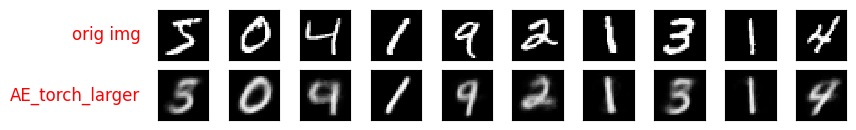

In [8]:
toPlot = (x_train, x_train_torch_large_reconstr.detach().numpy())
textRows = ["orig img", "AE_torch_larger"]

plt.figure(figsize=(9, 3))

for i in range(10):
    for j in range(2):
        ax = plt.subplot(4, 10, 10*j+i+1)
        plt.imshow(np.array(toPlot[j][i, :]).reshape(28, 28), interpolation="nearest",
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.text(-0.35, 0.5, textRows[j],
                    transform=ax.transAxes,
                    fontsize=12,
                    va='center',
                    ha='right',
                    color='red')

plt.show()

# Q4.2 (10 pts)
* construct an Autoencoder using PyTorch) with a bottleneck of $r=3$ neurons.
Use the bottleneck features to visualize the data (MNIST) in 3D and display the resulting 3D scatter plots side by side with a 3D PCA reduction.
Display also several reconstructed images (PCA vs AE). Compute reconstruction error.

* For some fixed $r>3$ do the same -- display reconstructed images and compute reconstruction error (compare the latter to previoues $r=2, r=3$ cases)

In [9]:
# PYTHORCH r=3 in BOOTLENECK LAYER
r = 3

torch_large_encoder_3 = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, r),
)

torch_large_decoder_3 = torch.nn.Sequential(
    torch.nn.Linear(r, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large_3 = torch.nn.Sequential(
    torch_large_encoder_3,
    torch_large_decoder_3
)

In [23]:
loss_torch_3 = torch.nn.MSELoss()
optimizer_3 = torch.optim.Adam(AE_torch_large_3.parameters())

n_epochs = 5
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_3.zero_grad()
        outputs = AE_torch_large_3(inputs)
        loss = loss_torch_3(outputs, targets)
        loss.backward()
        optimizer_3.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")

x_train_torch_encoded_3 = torch_large_encoder_3(x_train_tensor).detach().numpy()
x_train_torch_reconstr_3 = AE_torch_large_3(x_train_tensor)

Epoch 1/5, Loss: 0.030052
Epoch 2/5, Loss: 0.029826
Epoch 3/5, Loss: 0.029629
Epoch 4/5, Loss: 0.029472
Epoch 5/5, Loss: 0.029311


In [13]:
# PYTHORCH r=8 in BOOTLENECK LAYER
r = 8
torch_large_encoder_8 = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, r),
)

torch_large_decoder_8 = torch.nn.Sequential(
    torch.nn.Linear(r, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large_8 = torch.nn.Sequential(
    torch_large_encoder_8,
    torch_large_decoder_8
)

In [14]:
loss_torch_8 = torch.nn.MSELoss()
optimizer_8 = torch.optim.Adam(AE_torch_large_8.parameters())

n_epochs = 5
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_8.zero_grad()
        outputs = AE_torch_large_8(inputs)
        loss = loss_torch_8(outputs, targets)
        loss.backward()
        optimizer_8.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_encoded_8 = torch_large_encoder_8(x_train_tensor).detach().numpy()
x_train_torch_reconstr_8 = AE_torch_large_8(x_train_tensor)

Epoch 1/5, Loss: 0.038824
Epoch 2/5, Loss: 0.022708
Epoch 3/5, Loss: 0.019996
Epoch 4/5, Loss: 0.018531
Epoch 5/5, Loss: 0.017561


In [17]:
from sklearn.decomposition import PCA

# PCA - 2 components

model_PCA2 = PCA(n_components=2)
model_PCA2.fit(x_train)
points_train_PCA2 = model_PCA2.transform(x_train)
points_reconstructed2 = model_PCA2.inverse_transform(points_train_PCA2)

# PCA - 3 components

model_PCA3 = PCA(n_components=3)
model_PCA3.fit(x_train)
points_train_PCA3 = model_PCA3.transform(x_train)
points_reconstructed3 = model_PCA3.inverse_transform(points_train_PCA3)

# PCA - r = 8 components

model_PCA8 = PCA(n_components=8)
model_PCA8.fit(x_train)
points_train_PCA8 = model_PCA8.transform(x_train)
points_reconstructed8 = model_PCA8.inverse_transform(points_train_PCA8)

In [24]:
# Errors:

AE_torch_err_3 = np.sum((x_train-x_train_torch_reconstr_3.detach().numpy())**2)/(n_samples_train*image_size)
AE_torch_err_8 = np.sum((x_train-x_train_torch_reconstr_8.detach().numpy())**2)/(n_samples_train*image_size)
PCA_err_8 = np.sum((x_train-points_reconstructed8)**2)/(n_samples_train*image_size)
PCA_err_3 = np.sum((x_train-points_reconstructed3)**2)/(n_samples_train*image_size)
PCA_err_2 = np.sum((x_train-points_reconstructed2)**2)/(n_samples_train*image_size)

print(f"PCA reconstruction error (r = 2): {np.round(PCA_err_2, 3)}")
print(f"PCA reconstruction error (r = 3): {np.round(PCA_err_3, 3)}")
print(f"PCA reconstruction error (r = 8): {np.round(PCA_err_8, 3)}")
print(f"Torch reconstruction error (r = 3): {np.round(AE_torch_err_3, 3)}")
print(f"Torch reconstruction error (r = 8): {np.round(AE_torch_err_8, 3)}")

PCA reconstruction error (r = 2): 0.056
PCA reconstruction error (r = 3): 0.052
PCA reconstruction error (r = 8): 0.038
Torch reconstruction error (r = 3): 0.029
Torch reconstruction error (r = 8): 0.017


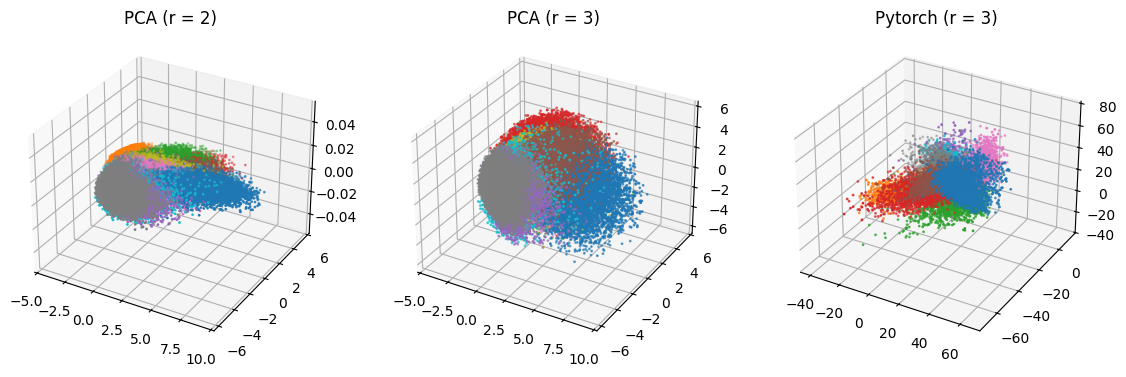

In [26]:
fig = plt.figure(figsize=(14, 10))
ax_PCA2 = fig.add_subplot(1, 3, 1, projection='3d')
ax_PCA2.set_title("PCA (r = 2)")
ax_PCA3 = fig.add_subplot(1, 3, 2, projection='3d')
ax_PCA3.set_title("PCA (r = 3)")

for label in range(len(np.unique(y_train))):
    points_PCA_2 = points_train_PCA2[y_train == label]
    ax_PCA2.scatter(points_PCA_2[:, 0], points_PCA_2[:, 1], s=1)

    points_PCA_3 = points_train_PCA3[y_train == label]
    ax_PCA3.scatter(points_PCA_3[:, 0], points_PCA_3[:, 1], points_PCA_3[:, 2], s=1)

ax_AE = fig.add_subplot(1, 3, 3, projection='3d')

for label in range(len(np.unique(y_train))):
    points_AE = x_train_torch_encoded_3[y_train == label]
    ax_AE.scatter(points_AE[:, 0], points_AE[:, 1], points_AE[:, 2], s=1)

ax_AE.set_title("Pytorch (r = 3)")
plt.show()

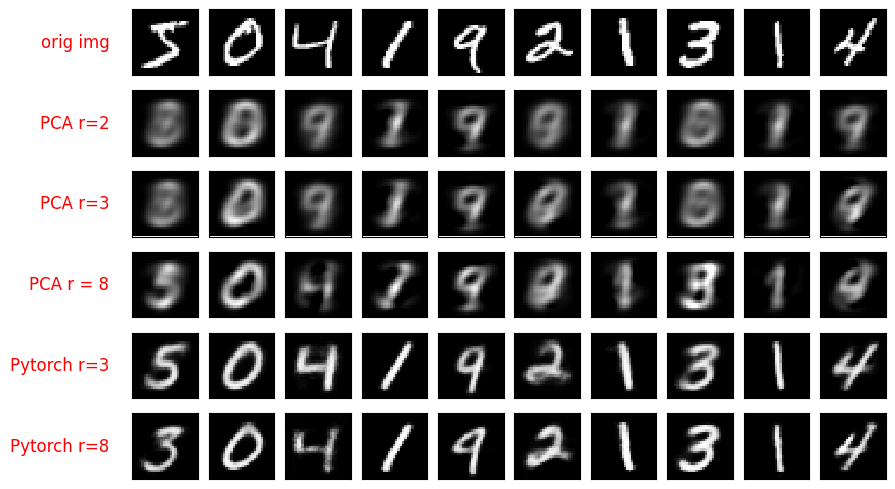

In [28]:
toPlot = (x_train, points_reconstructed2,  points_reconstructed3, points_reconstructed8,
          x_train_torch_reconstr_3.detach().numpy(), x_train_torch_reconstr_8.detach().numpy())
text_rows = ["orig img", "PCA r=2", "PCA r=3", "PCA r = 8", "Pytorch r=3", "Pytorch r=8"]

nRows = len(toPlot)   # Should be 3
nCols = 10            # Number of images per row

plt.figure(figsize=(9, 5))

for j in range(nRows):
    for i in range(nCols):
        ax = plt.subplot(nRows, nCols, j*nCols + i + 1)
        # Reshape each image (assumed to be flattened 28x28) and show.
        plt.imshow(np.array(toPlot[j][i, :]).reshape(28, 28), interpolation="nearest", vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # Add row label on the first column of each row.
        if i == 0:
            ax.text(-0.35, 0.5, text_rows[j],
                    transform=ax.transAxes,
                    fontsize=12,
                    va='center',
                    ha='right',
                    color='red')

plt.tight_layout()
plt.show()

# Q4.3 (10 pts)
* Construct Autoencoder (similar to AE_torch_larger, but may have larger $r$ -- this is a paramter, set initially $r=10$) so that: on input it gets noisy images from training set (i.e., `x_train_noisy`), the output is compared to original unnoised image (i.e., from `x_train`, use `mean_squared_error`).
* Display some of your denoised images
* Unnoise images `x_test_noisy` and compare (MSE) with `x_test`
* Play around: try different number of hidden layers, different activation functions, etc. For your best network try to apply it for larger values of `noise_level`

In [30]:
noise_level = 0.25

x_train_noisy = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy_tensor = torch.tensor(x_train_noisy, dtype=torch.float32)
x_test_noisy_tensor = torch.tensor(x_test_noisy, dtype=torch.float32)

In [31]:
# PYTHORCH r=10 in BOOTLENECK LAYER
r = 10

dataset = TensorDataset(x_train_tensor, x_train_noisy_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

torch_large_encoder_10 = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, r),
)

torch_large_decoder_10 = torch.nn.Sequential(
    torch.nn.Linear(r, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large_10 = torch.nn.Sequential(
    torch_large_encoder_10,
    torch_large_decoder_10
)

In [32]:
loss_torch_10 = torch.nn.MSELoss()
optimizer_10 = torch.optim.Adam(AE_torch_large_10.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_10.zero_grad()
        outputs = AE_torch_large_10(inputs)
        loss = loss_torch_10(outputs, targets)
        loss.backward()
        optimizer_10.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_encoded_10 = torch_large_encoder_10(x_train_noisy_tensor).detach().numpy()
x_train_torch_reconstr_10 = AE_torch_large_10(x_train_noisy_tensor)
x_train_torch_reconstr_np_10 = x_train_torch_reconstr_10.detach().numpy()

Epoch 1/6, Loss: 0.103124
Epoch 2/6, Loss: 0.083714
Epoch 3/6, Loss: 0.080618
Epoch 4/6, Loss: 0.079008
Epoch 5/6, Loss: 0.077972
Epoch 6/6, Loss: 0.077221


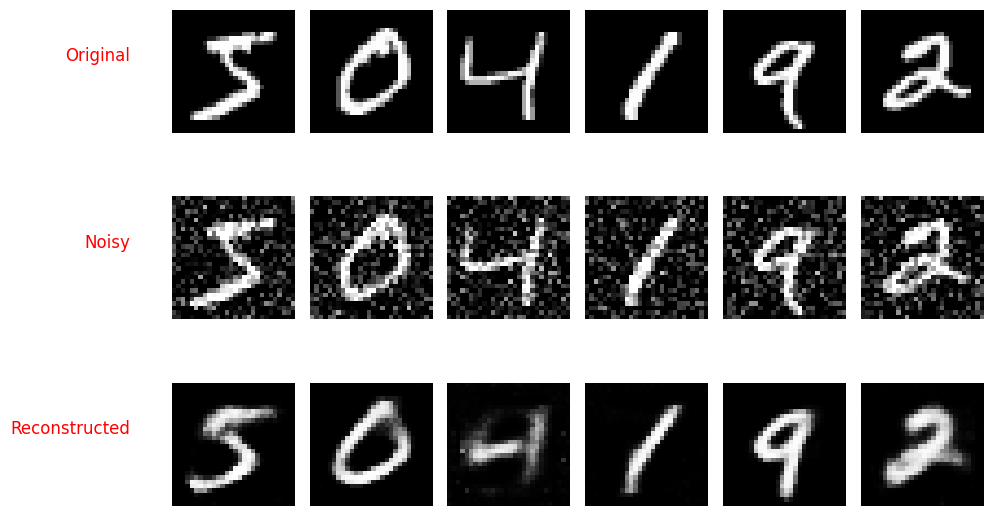

In [49]:
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(10, 6))
row_titles = ['Original', 'Noisy', 'Reconstructed']

for i in range(6):
    # Original image
    ax = plt.subplot(3, 6, i + 1)
    if i == 0:
        ax.text(-10, 10, row_titles[0], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_train[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Noisy image
    ax = plt.subplot(3, 6, i + 7)
    if i == 0:
        ax.text(-10, 10, row_titles[1], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_train_noisy[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, 6, i + 13)
    if i == 0:
        ax.text(-10, 10, row_titles[2], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(np.array(x_train_torch_reconstr_np_10[i]).reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [90]:
print(f"MSE train: {mean_squared_error(x_train, x_train_torch_reconstr_np_10)}")

x_test_reconstr = AE_torch_large_10(x_test_noisy_tensor).detach().numpy()
print(f"MSE test: {mean_squared_error(x_test, x_test_reconstr)}")

MSE train: 0.02090862482066498
MSE test: 0.24406006165369148


In [91]:
# ANOTHER APPROACHES
r = 10
torch_encoder_diff = torch.nn.Sequential(
    torch.nn.Linear(784, 128),
    torch.nn.Hardtanh(),
    torch.nn.Linear(128, 64),
    torch.nn.Hardtanh(),
    torch.nn.Linear(64, r),
)

torch_decoder_diff = torch.nn.Sequential(
    torch.nn.Linear(r,  64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, 784),
    torch.nn.ReLU()
)

AE_torch_diff = torch.nn.Sequential(
    torch_encoder_diff,
    torch_decoder_diff
)

In [92]:
loss_torch_diff = torch.nn.MSELoss()
optimizer_diff = torch.optim.Adam(AE_torch_diff.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_diff.zero_grad()
        outputs = AE_torch_diff(inputs)
        loss = loss_torch_diff(outputs, targets)
        loss.backward()
        optimizer_diff.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")

Epoch 1/6, Loss: 0.117597
Epoch 2/6, Loss: 0.101520
Epoch 3/6, Loss: 0.099082
Epoch 4/6, Loss: 0.097441
Epoch 5/6, Loss: 0.096181
Epoch 6/6, Loss: 0.095377


In [93]:
# ANOTHER APPROACHES
r = 8
torch_encoder_diff = torch.nn.Sequential(
    torch.nn.Linear(784, 64),
    torch.nn.ELU(),
    torch.nn.Linear(64, r),
)

torch_decoder_diff = torch.nn.Sequential(
    torch.nn.Linear(r,  64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, 784),
    torch.nn.ReLU()
)

AE_torch_diff = torch.nn.Sequential(
    torch_encoder_diff,
    torch_decoder_diff
)

In [94]:
loss_torch_diff = torch.nn.MSELoss()
optimizer_diff = torch.optim.Adam(AE_torch_diff.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_diff.zero_grad()
        outputs = AE_torch_diff(inputs)
        loss = loss_torch_diff(outputs, targets)
        loss.backward()
        optimizer_diff.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")

Epoch 1/6, Loss: 0.121116
Epoch 2/6, Loss: 0.108024
Epoch 3/6, Loss: 0.104362
Epoch 4/6, Loss: 0.101875
Epoch 5/6, Loss: 0.100741
Epoch 6/6, Loss: 0.100072


In [98]:
# THE "BEST" APPROACH
r = 20
torch_encoder_diff = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.Hardtanh(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 64),
    torch.nn.Hardtanh(),
    torch.nn.Linear(64, r),
)

torch_decoder_diff = torch.nn.Sequential(
    torch.nn.Linear(r,  64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.ReLU()
)

AE_torch_diff = torch.nn.Sequential(
    torch_encoder_diff,
    torch_decoder_diff
)

In [99]:
loss_torch_diff = torch.nn.MSELoss()
optimizer_diff = torch.optim.Adam(AE_torch_diff.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_diff.zero_grad()
        outputs = AE_torch_diff(inputs)
        loss = loss_torch_diff(outputs, targets)
        loss.backward()
        optimizer_diff.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_encoded_diff = torch_encoder_diff(x_train_noisy_tensor).detach().numpy()
x_train_torch_reconstr_diff = AE_torch_diff(x_train_noisy_tensor)
x_train_torch_reconstr_np_diff = x_train_torch_reconstr_diff.detach().numpy()

Epoch 1/6, Loss: 0.103334
Epoch 2/6, Loss: 0.085543
Epoch 3/6, Loss: 0.081254
Epoch 4/6, Loss: 0.078911
Epoch 5/6, Loss: 0.077753
Epoch 6/6, Loss: 0.077012


In [100]:
noise_level = 0.40

x_train_noisy = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy_tensor = torch.tensor(x_train_noisy, dtype=torch.float32)
x_test_noisy_tensor = torch.tensor(x_test_noisy, dtype=torch.float32)

In [103]:
x_train_torch_encoded_noiser = torch_encoder_diff(x_train_noisy_tensor).detach().numpy()
x_train_torch_reconstr_noiser  = AE_torch_diff(x_train_noisy_tensor)
x_train_torch_reconstr_np_noiser  = x_train_torch_reconstr_noiser.detach().numpy()

print(f"MSE train: {mean_squared_error(x_train, x_train_torch_reconstr_np_noiser)}")

x_test_reconstr_np_noiser = AE_torch_diff(x_test_noisy_tensor).detach().numpy()
print(f"MSE test: {mean_squared_error(x_test, x_test_reconstr_np_noiser)}")

MSE train: 0.029922243812598517
MSE test: 0.0183273829346442
